<a href="https://colab.research.google.com/github/kevvinnn/SpaceTitanicKaggle/blob/main/SpaceshipTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/trainSpaceTitanic.csv')

In [2]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [3]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
numerical_features = df.select_dtypes(include=[np.number])
categorical_features = df.select_dtypes(include=[object])
bool_features = df.select_dtypes(include=[bool])

In [7]:
numerical_features.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


In [8]:
categorical_features.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines


In [9]:
bool_features.head()

,Transported
0,False
1,True
2,False
3,False
4,True


In [10]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('categorical', categorical_pipeline, categorical_features.columns),
    ('numerical', numerical_pipeline, numerical_features.columns)
], remainder='passthrough')

X = df.drop('Transported', axis=1)
y = df['Transported']

df_preprocessed = preprocessor.fit_transform(X)

In [11]:
df_preprocessed.shape

(8693, 23742)

In [12]:
!pip install catboost
X_train, X_test, y_train, y_test = train_test_split(df_preprocessed, y, test_size=0.2, random_state=42)

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import catboost as cb
from catboost import CatBoostClassifier

xgb_model = xgb.XGBClassifier()

xgb_param_grid ={
    'n_estimators': [300],
    'max_depth': [3],
    'learning_rate': [0.1],
    'subsample': [1.0],
    'min_child_weight': [1]
}

rfc = RandomForestClassifier()
catc = cb.CatBoostClassifier()

rfc_param_grid = {
    'n_estimators': [100],
    'max_depth': [5]
}

catc_param_grid = {
    'iterations': [100],
    'learning_rate': [0.01, 0.001]
}

xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

rfc_grid_search = GridSearchCV(rfc, rfc_param_grid, cv=3, scoring='accuracy', n_jobs=-1, error_score="raise")
rfc_grid_search.fit(X_train, y_train)

catc_grid_search = GridSearchCV(catc, catc_param_grid, cv=3, scoring='accuracy', n_jobs=-1, error_score='raise')
catc_grid_search.fit(X_train, y_train)

print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
print("Best score for XGBoost:", xgb_grid_search.best_score_)

print("Best parameters for Random Forest:", rfc_grid_search.best_params_)
print("Best score for Random Forest:", rfc_grid_search.best_score_)

print("Best parameters for CatBoost:", catc_grid_search.best_params_)
print("Best score for CatBoost:", catc_grid_search.best_score_)

0:	learn: 0.6877213	total: 113ms	remaining: 11.2s
1:	learn: 0.6831685	total: 182ms	remaining: 8.9s
2:	learn: 0.6780431	total: 249ms	remaining: 8.06s
3:	learn: 0.6732300	total: 316ms	remaining: 7.58s
4:	learn: 0.6687468	total: 382ms	remaining: 7.26s
5:	learn: 0.6639158	total: 448ms	remaining: 7.01s
6:	learn: 0.6602134	total: 523ms	remaining: 6.95s
7:	learn: 0.6565242	total: 588ms	remaining: 6.77s
8:	learn: 0.6521577	total: 659ms	remaining: 6.66s
9:	learn: 0.6479591	total: 732ms	remaining: 6.59s
10:	learn: 0.6440931	total: 798ms	remaining: 6.46s
11:	learn: 0.6402046	total: 865ms	remaining: 6.34s
12:	learn: 0.6373733	total: 944ms	remaining: 6.32s
13:	learn: 0.6341597	total: 1.01s	remaining: 6.24s
14:	learn: 0.6313434	total: 1.09s	remaining: 6.17s
15:	learn: 0.6277667	total: 1.16s	remaining: 6.08s
16:	learn: 0.6239985	total: 1.22s	remaining: 5.98s
17:	learn: 0.6209735	total: 1.29s	remaining: 5.87s
18:	learn: 0.6172443	total: 1.36s	remaining: 5.79s
19:	learn: 0.6142674	total: 1.43s	remainin

In [13]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/trainSpaceTitanic.csv')

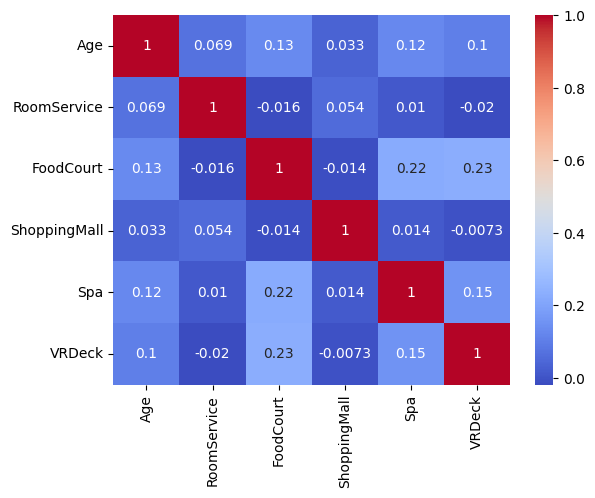

In [14]:
#Making new features to see if model accuracy improves and using heatmap to see if any features are too correlated
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')

df['AmountSpent'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']

In [15]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'AmountSpent'],
      dtype='object')

<Axes: xlabel='Transported', ylabel='CryoSleep'>

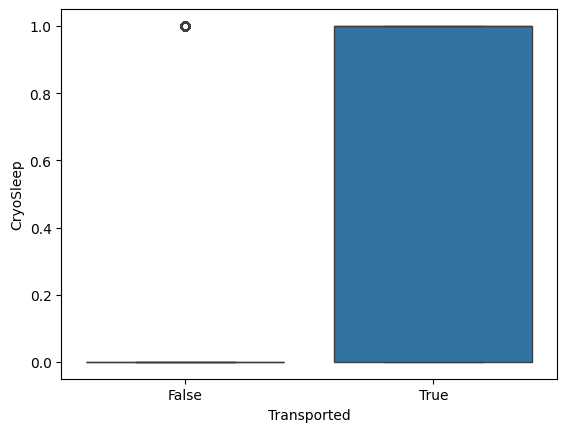

In [16]:
sns.boxplot(x='Transported', y='CryoSleep', data=df)

In [17]:
a = df.query('CryoSleep == 1 and Transported == 1')['Transported'].count()
b = df.query('CryoSleep == 0 and Transported == 1')['Transported'].count()
c = df.query('CryoSleep == 1')['Transported'].count()
d = df.query('CryoSleep == 0')['Transported'].count()
a/c,b/d
#looks like theres about an 82% chance of getting transported if a person does choose cryosleep

(0.8175831412578202, 0.3289207574921861)

In [18]:
d=df.query('VIP == 1 and Transported == 1')['Transported'].count()/df.query('VIP == 1')['Transported'].count(),
c=df.query('VIP == 0 and Transported == 1')['Transported'].count()/df.query('VIP == 0')['Transported'].count()
d,c

((0.38190954773869346,), 0.5063321674104451)

In [19]:
a = df.query('HomePlanet != "Earth" and HomePlanet != "Europa" and Transported == 1')['Transported'].count()
b = df.query('HomePlanet != "Earth" and HomePlanet != "Europa"')['Transported'].count()
a/b

0.5219387755102041

In [20]:
d = df.query('Destination == "TRAPPIST-1e" and Transported == 1')['Transported'].count()
f = df.query('Destination == "TRAPPIST-1e"')['Transported'].count()
d/f

0.47117497886728654

In [21]:
d = df.query('HomePlanet == "Earth" and Transported == 1')['Transported'].count()
f = df.query('HomePlanet == "Earth"')['Transported'].count()

a = df.query('HomePlanet == "Europa" and Transported == 1')['Transported'].count()
c = df.query('HomePlanet == "Europa"')['Transported'].count()
d/f,a/c

(0.42394611038678837, 0.65884561238855)

In [22]:
df['AmountSpent'].describe()

count     7785.000000
mean      1484.601541
std       2845.288241
min          0.000000
25%          0.000000
50%        736.000000
75%       1486.000000
max      35987.000000
Name: AmountSpent, dtype: float64

In [23]:
df.query('AmountSpent < 1000')['Transported'].value_counts()

Transported
True     3116
False    2060
Name: count, dtype: int64

In [24]:
df.query('AmountSpent < 750')['Transported'].value_counts()

Transported
True     2754
False    1194
Name: count, dtype: int64

In [25]:
df.query('Age > 25')['Transported'].value_counts()

Transported
False    2380
True     2238
Name: count, dtype: int64

In [26]:
df.query('Age > 25 and CryoSleep == 1')['Transported'].value_counts()

Transported
True     1277
False     224
Name: count, dtype: int64

In [27]:
df.query('RoomService == 0')['Transported'].value_counts()

Transported
True     3532
False    2045
Name: count, dtype: int64

In [28]:
df.query('FoodCourt == 0')['Transported'].value_counts()

Transported
True     3224
False    2232
Name: count, dtype: int64

In [29]:
df.query('AmountSpent > 0')['Transported'].value_counts()

Transported
False    3171
True     1367
Name: count, dtype: int64

In [30]:
df.query('Destination == "TRAPPIST-1e" and HomePlanet == "Earth"')['Transported'].value_counts()

Transported
False    1894
True     1207
Name: count, dtype: int64

In [31]:
df['HomeDestination'] = df['HomePlanet'] + df['Destination']
df['HomeDestination'].value_counts()

HomeDestination
EarthTRAPPIST-1e       3101
MarsTRAPPIST-1e        1475
EuropaTRAPPIST-1e      1189
Europa55 Cancri e       886
EarthPSO J318.5-22      712
Earth55 Cancri e        690
Mars55 Cancri e         193
MarsPSO J318.5-22        49
EuropaPSO J318.5-22      19
Name: count, dtype: int64

<Axes: xlabel='Destination', ylabel='HomePlanet'>

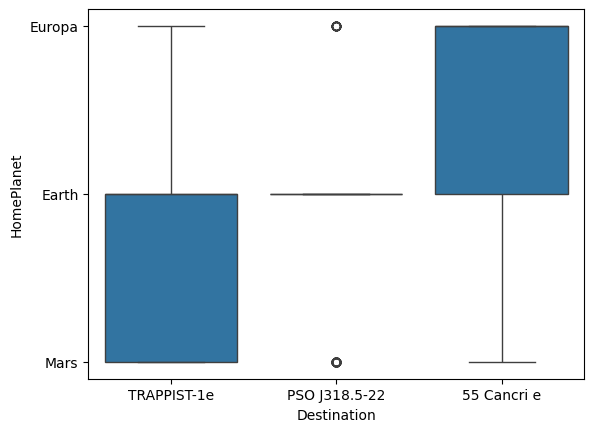

In [32]:
sns.boxplot(x='Destination', y='HomePlanet', data=df)

In [33]:
df['SpentMoney'] = df['AmountSpent'] > 0
df['SpentMoney']

0       False
1        True
2        True
3        True
4        True
        ...  
8688     True
8689    False
8690     True
8691     True
8692     True
Name: SpentMoney, Length: 8693, dtype: bool

In [34]:
df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)
df = df.drop('Cabin', axis=1)

In [35]:
df.query('CryoSleep == 1 and AmountSpent == 0')['Transported'].value_counts()

Transported
True     2194
False     496
Name: count, dtype: int64

In [36]:
df.query('CryoSleep == 1 and Age < 150')['Transported'].value_counts()

Transported
True     2419
False     536
Name: count, dtype: int64

In [37]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported', 'AmountSpent', 'HomeDestination', 'SpentMoney', 'Deck',
       'Num', 'Side'],
      dtype='object')

In [38]:
d = df.query('AmountSpent < 100')['PassengerId'].count()
c = df.query('AmountSpent > 100 and AmountSpent < 1000')['PassengerId'].count()
e = df.query('AmountSpent > 1000')['PassengerId'].count()
d,c,e

(3247, 1929, 2609)

In [39]:
df['WealthClass'] = df['AmountSpent'].apply(lambda x: 1 if x < 100 else 2 if x < 1000 else 3)

In [40]:
a = df.query('Side == "S"')['Transported'].value_counts()
b = df.query('Side == "P"')['Transported'].value_counts()
a,b

(Transported
 True     2380
 False    1908
 Name: count, dtype: int64,
 Transported
 False    2308
 True     1898
 Name: count, dtype: int64)

In [41]:
df.query('Side == "S" and CryoSleep == 1')['Transported'].value_counts(),df.query('Side == "P" and CryoSleep == 1')['Transported'].value_counts()

(Transported
 True     1310
 False     223
 Name: count, dtype: int64,
 Transported
 True     1106
 False     314
 Name: count, dtype: int64)

In [42]:
'''df[['First', 'Last']] = df['Name'].str.split(' ', expand=True)
dict = {}
for n in df['Last']:
  if n in dict:
    dict[n] += 1
  else:
    dict[n] = 1

df['FamilySize'] = df['Last'].map(dict)

dict = {}
for n in df['Last']:
  if n in dict:
    dict[n] = 1
  else:
    dict[n] = 0

df['HasSibling'] = df['Last'].map(dict)'''
#didnt make model better


"df[['First', 'Last']] = df['Name'].str.split(' ', expand=True)\ndict = {}\nfor n in df['Last']:\n  if n in dict:\n    dict[n] += 1\n  else:\n    dict[n] = 1\n\ndf['FamilySize'] = df['Last'].map(dict)\n\ndict = {}\nfor n in df['Last']:\n  if n in dict:\n    dict[n] = 1\n  else:\n    dict[n] = 0\n\ndf['HasSibling'] = df['Last'].map(dict)"

In [43]:
df['Deck'].value_counts()

Deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

In [44]:
df.query('Deck == "G" and CryoSleep == 1')['Transported'].value_counts()

Transported
True     890
False    460
Name: count, dtype: int64

In [45]:
df['Age'].describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [46]:
df_droppedColumns = df.drop(['PassengerId', 'Name'], axis=1)

<Axes: >

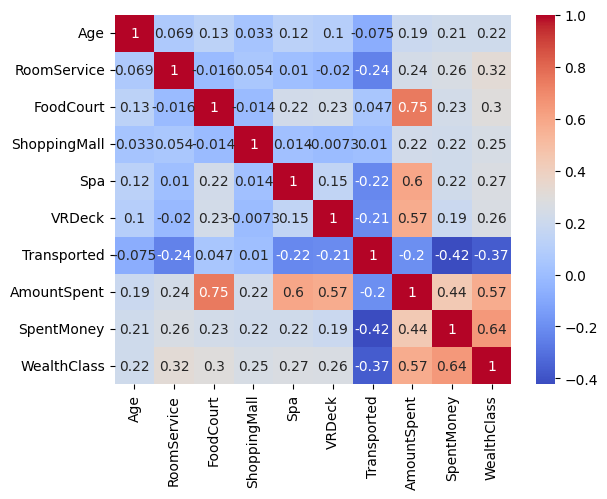

In [47]:
sns.heatmap(df_droppedColumns.corr(numeric_only=True), annot=True, cmap='coolwarm')
#Check correlations

In [48]:
df_droppedColumns.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,AmountSpent,HomeDestination,SpentMoney,Deck,Num,Side,WealthClass
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,EuropaTRAPPIST-1e,False,B,0,P,1
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0,EarthTRAPPIST-1e,True,F,0,S,2
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,EuropaTRAPPIST-1e,True,A,0,S,3
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0,EuropaTRAPPIST-1e,True,A,0,S,3
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0,EarthTRAPPIST-1e,True,F,1,S,3


In [51]:
categorical_features = df_droppedColumns.select_dtypes(include=[object])
numerical_features = df_droppedColumns.select_dtypes(include=[np.number])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
])

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor1 = ColumnTransformer([
    ('categorical', categorical_pipeline, categorical_features.columns),
    ('numerical', numerical_pipeline, numerical_features.columns)
], remainder='passthrough')

X = df_droppedColumns.drop('Transported', axis=1)
y = df_droppedColumns['Transported']

df_preprocessed = preprocessor1.fit_transform(X)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df_preprocessed, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier()

xgb_param_grid ={
    'n_estimators': [200],
    'max_depth': [3],
    'learning_rate': [.2],
    'subsample': [1.0],
    'min_child_weight': [2]
}

rfc = RandomForestClassifier()
catc = cb.CatBoostClassifier()

rfc_param_grid = {
    'n_estimators': [75],
    'max_depth': [2],
    'min_samples_split': [2]
}

catc_param_grid = {
    'iterations': [100],
    'learning_rate': [.1]
}

xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

rfc_grid_search = GridSearchCV(rfc, rfc_param_grid, cv=5, scoring='accuracy', n_jobs=-1, error_score="raise")
rfc_grid_search.fit(X_train, y_train)

catc_grid_search = GridSearchCV(catc, catc_param_grid, cv=10, scoring='accuracy', n_jobs=-1, error_score='raise')
catc_grid_search.fit(X_train, y_train)

print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
print("Best score for XGBoost:", xgb_grid_search.best_score_)

print("Best parameters for Random Forest:", rfc_grid_search.best_params_)
print("Best score for Random Forest:", rfc_grid_search.best_score_)

print("Best parameters for CatBoost:", catc_grid_search.best_params_)
print("Best score for CatBoost:", catc_grid_search.best_score_)

#xgb - .8106 with 5 cv
#cat - .81119 with 10 cv

0:	learn: 0.6487103	total: 22.6ms	remaining: 2.24s
1:	learn: 0.6121856	total: 42.4ms	remaining: 2.08s
2:	learn: 0.5874140	total: 61.9ms	remaining: 2s
3:	learn: 0.5663271	total: 85.4ms	remaining: 2.05s
4:	learn: 0.5460628	total: 106ms	remaining: 2.01s
5:	learn: 0.5286691	total: 130ms	remaining: 2.04s
6:	learn: 0.5166707	total: 153ms	remaining: 2.03s
7:	learn: 0.5051278	total: 176ms	remaining: 2.02s
8:	learn: 0.4918033	total: 199ms	remaining: 2.01s
9:	learn: 0.4837143	total: 225ms	remaining: 2.03s
10:	learn: 0.4751928	total: 248ms	remaining: 2.01s
11:	learn: 0.4678089	total: 271ms	remaining: 1.99s
12:	learn: 0.4621262	total: 294ms	remaining: 1.97s
13:	learn: 0.4573416	total: 314ms	remaining: 1.93s
14:	learn: 0.4544032	total: 335ms	remaining: 1.9s
15:	learn: 0.4505273	total: 357ms	remaining: 1.88s
16:	learn: 0.4469964	total: 381ms	remaining: 1.86s
17:	learn: 0.4429003	total: 407ms	remaining: 1.85s
18:	learn: 0.4398500	total: 427ms	remaining: 1.82s
19:	learn: 0.4375140	total: 450ms	remaini

In [53]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/testSpaceTitanic.csv')
df_test1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/testSpaceTitanic.csv')

In [54]:
df_test['AmountSpent'] = df_test['RoomService'] + df_test['FoodCourt'] + df_test['ShoppingMall'] + df_test['Spa'] + df_test['VRDeck']
df_test['WealthClass'] = df_test['AmountSpent'].apply(lambda x: 1 if x < 100 else 2 if x < 1000 else 3)
df_test['SpentMoney'] = df_test['AmountSpent'] > 0
df_test[['Deck', 'Num', 'Side']] = df_test['Cabin'].str.split('/', expand=True)
df_test['HomeDestination'] = df_test['HomePlanet'] + df_test['Destination']
df_test = df_test.drop(['PassengerId', 'Name', 'Cabin'], axis=1)

In [55]:
df_preprocessed = preprocessor1.transform(df_test)

In [56]:
y_catb = catc_grid_search.predict(df_preprocessed)

y_catb_out = df_test1[['PassengerId']]
y_catb_out['Transported'] = y_catb
y_catb_out.to_csv('submissionSpaceTitanicCAT.csv', index=False)

y_xgb = xgb_grid_search.predict(df_preprocessed)

y_xgb_out = df_test1[['PassengerId']]
y_xgb_out['Transported'] = y_xgb
y_xgb_out.to_csv('submissionSpaceTitanicXGB.csv', index=False)

y_rfc = rfc_grid_search.predict(df_preprocessed)

y_rfc_out = df_test1[['PassengerId']]
y_rfc_out['Transported'] = y_rfc
y_rfc_out.to_csv('submissionSpaceTitanicRFC.csv', index=False)

<ipython-input-56-09dae4448657>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_catb_out['Transported'] = y_catb
<ipython-input-56-09dae4448657>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_xgb_out['Transported'] = y_xgb
<ipython-input-56-09dae4448657>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in